# Numerical Integration

## Equally Spaced Points

### Trapezoidal Rule
Assuming $n$ equally spaced points $x_0=x_l, x_1, \ldots , x_{n-2}, x_{n-1}=x_u$ with $h = x_i - x_{i-1}$ and corresponding values of the function stored in an array $y_0, y_1, \ldots , y_{n-2}, y_{n-1}$, the approximation to the integral is
$$
I = \int_{x_l}^{x_{u}} y \ dx \approx \frac{h}{2} \left[ y_0 + 2 \left( y_1 + y_2 + \cdots + y_{n-3} + y_{n-2} \right) + y_{n-1} \right]
$$
The above expresion presumes that the function $y = f(x)$ has been evaluated at $n$ equally spaced points prior to computing the integral

In this procedure, we take the following approach:

1. Generate $n$ equally spaced data points $x_i, i = 0, 1, 2, \ldots , n-1$
2. Compute the value of the function for each of the data points $y_i = f(x_i)$
3. Carry out numerical integration using Trapezoidal rule

10000 loops, best of 3: 81.3 µs per loop
1.99999342026


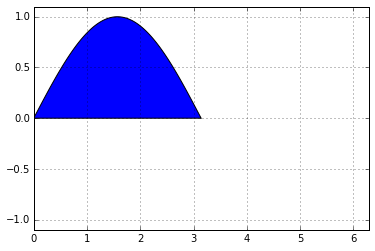

In [15]:
from __future__ import print_function, division
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

def trap(h, y):
    n = len(y)
    s = y[0] + 2 * sum(y[1:-1]) + y[-1]
    return s * h / 2.0

x1 = 0.0
x2 = np.pi
n = 500
x = np.linspace(x1, x2, n+1)
y = np.sin(x)
h = (x2 - x1) / float(n)
I = trap(h, y)
%timeit trap(h, y)
print(I)
plt.fill(x, y)
plt.axis([x1, 2*x2, -1.1, 1.1])
plt.grid()
plt.show()

In [14]:
def f(x):
    return np.sin(x)

def trap2(f, x1, x2, n):
    h = (x2 - x1) / n
    x = np.linspace(x1, x2, n+1)
    y = f(x)
    s = y[0] + 2 * sum(y[1:-1]) + y[-1]
    return s * h / 2

I = trap2(f, 0, np.pi, 500)
print(I)
%timeit trap2(f, 0, np.pi, 500)

1.99999342026
10000 loops, best of 3: 105 µs per loop


In [13]:
def trap3(f, x1, x2, n):
    h = (x2 - x1) / n
    s = (f(x1) + f(x2)) / 2
    x = x1 + h
    while x <= x2:
        s += f(x)
        x += h
    return s * h

I = trap3(f, 0, np.pi, 500)
print(I)
%timeit trap3(f, 0, np.pi, 500)

1.99999342026
1000 loops, best of 3: 851 µs per loop


### Simpson's 1/3 Rule

$$
I = \int_{x_1}^{x_2} y \, dx \approx \frac{h}{3} \left[ y_0 + 4 \left( y_1 + y_3 + \cdots + y_{n-2} \right) + 2 \left( y_2 + y_4 + \cdots + y_{n-3} \right) + y_{n-1} \right]
$$

In [16]:
def simp(f, x1, x2, n):
    h = (x2 - x1) / n
    x = np.linspace(x1, x2, n+1)
    y = f(x)
    s = y[0] + y[-1]
    s += 4 * sum(y[1:-1:2])
    s += 2 * sum(y[2:-2:2])
    return s * h / 3

I = simp(f, 0, np.pi, 500)
print(I)
%timeit simp(f, 0, np.pi, 500)

2.00000000002
10000 loops, best of 3: 106 µs per loop


In [18]:
from sympy import *
x = symbols('x')
integrate(sin(x), (x, 0, pi))

2